<a href="https://colab.research.google.com/github/YayunEldina/PCVK_Ganjil_2024/blob/main/Week%204.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

**1. Membuat Gamma Correction**

Gamma Correction pada citra
----------------------------------
Masukkan nilai kecerahan: 3


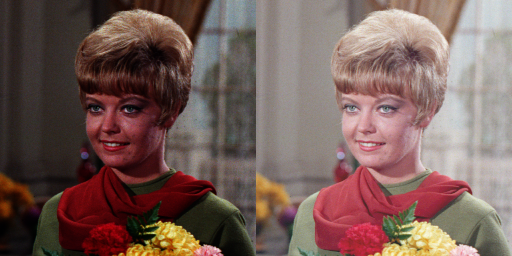

In [15]:
print('Gamma Correction pada citra')
print('----------------------------------')

# Get brightness input and calculate invGamma
try:
    brightness = int(input('Masukkan nilai kecerahan: '))
    invGamma = 1.0 / brightness  # Calculate invGamma
except ValueError:
    print('Error, not a number')
    exit()

# Read the original image
original = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/female.tiff')
gamma_corrected_image = np.zeros(original.shape, original.dtype)

# Apply gamma correction pixel by pixel
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            # Apply gamma correction formula
            gamma_corrected_image[y, x, c] = np.clip(255 * (original[y, x, c] / 255) ** invGamma, 0, 255)

# Display the original and gamma-corrected images side by side
final_frame = cv.hconcat((original, gamma_corrected_image))
cv2_imshow(final_frame)


**2. Membuat Simulasi Image Depth**

Simulasi Image Depth pada citra
----------------------------------


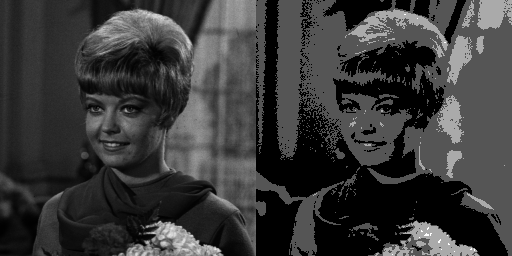

In [20]:
print('Simulasi Image Depth pada citra')
print('----------------------------------')

bit_depth = 2  # Set desired bit depth
level = 255 / (pow(2, bit_depth) - 1)

# Convert the original image to grayscale
original_gray = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/female.tiff', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original_gray.shape, original_gray.dtype)

# Apply the bit depth transformation
for y in range(original_gray.shape[0]):
    for x in range(original_gray.shape[1]):
        # Simulate image depth
        depth_value = np.round(original_gray[y, x] / level) * level
        depth_image[y, x] = np.clip(depth_value, 0, 255)

# Display the original and depth images side by side
final_frame = cv.hconcat((original_gray, depth_image.astype(np.uint8)))  # Ensure depth_image is uint8
cv2_imshow(final_frame)


**3. Membuat modul Average Denoising**

In [27]:
import cv2 as cv
import glob

cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK_MM/images/galaxy.jpg.'):
    n = cv.imread(img)  # Indent this line
    cv_img.append(n)


In [31]:
import cv2 as cv
import glob

# Initialize an empty list to store images
cv_img = []

# Read the original image
original_image_path = '/content/drive/MyDrive/PCVK_MM/Images/galaxy.jpg'
original_image = cv.imread(original_image_path)
cv_img.append(original_image)  # Append the original image to the list

# Read all noisy images from the specified folder
for img in glob.glob('/content/drive/MyDrive/PCVK_MM/Images/noises/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)  # Append each noisy image to the list


a. Jumlah Citra di Average 5

Average Denoising on Single Image
-----------------------------------


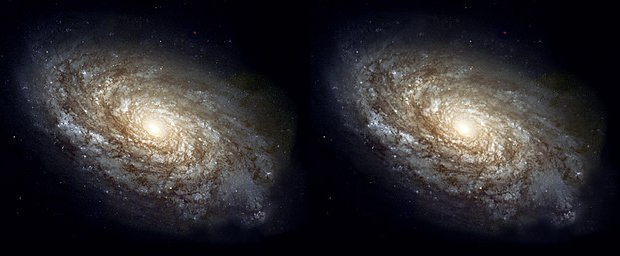

PSNR: 64.13 dB


In [51]:
print('Average Denoising on Single Image')
print('-----------------------------------')

# Read the original image
original_image_path = '/content/drive/MyDrive/PCVK_MM/Images/galaxy.jpg'
original_image = cv.imread(original_image_path)

# Check if the image was loaded successfully
if original_image is None:
    print(f"Error: Unable to load image at {original_image_path}")
else:
    # Create multiple copies of the original image for averaging
    cv_img = [original_image.copy() for _ in range(5)]  # Create a list with 5 copies of the original image

    # Compute the average of the images (which are all the same)
    average_image = np.zeros_like(cv_img[0], dtype=np.float32)

    for i in range(5):  # Average the first 5 copies of the original image
        average_image += cv_img[i] / 5

    # Convert the average image to uint8
    average_image = np.clip(average_image, 0, 255).astype(np.uint8)

    # Calculate PSNR
    mse = np.mean((original_image.astype(np.float32) - average_image.astype(np.float32)) ** 2)
    if mse == 0:
        psnr_value = float('inf')  # Infinite PSNR if there is no noise
    else:
        max_pixel = 255.0
        psnr_value = 10 * np.log10((max_pixel ** 2) / mse)

    # Display the original and average images side by side
    final_frame = cv.hconcat((original_image, average_image))
    cv2_imshow(final_frame)

    # Print the PSNR value
    print(f"PSNR: {psnr_value:.2f} dB")


b. Jumlah Citra di Average 10

Average Denoising on Single Image
-----------------------------------


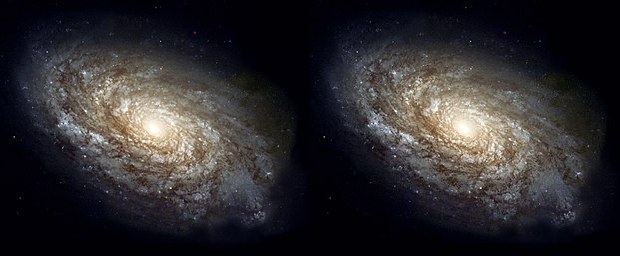

PSNR: 53.75 dB


In [52]:
print('Average Denoising on Single Image')
print('-----------------------------------')

# Read the original image
original_image_path = '/content/drive/MyDrive/PCVK_MM/Images/galaxy.jpg'
original_image = cv.imread(original_image_path)

# Check if the image was loaded successfully
if original_image is None:
    print(f"Error: Unable to load image at {original_image_path}")
else:
    # Create multiple copies of the original image for averaging
    cv_img = [original_image.copy() for _ in range(10)]  # Create a list with 5 copies of the original image

    # Compute the average of the images (which are all the same)
    average_image = np.zeros_like(cv_img[0], dtype=np.float32)

    for i in range(10):  # Average the first 5 copies of the original image
        average_image += cv_img[i] / 10

    # Convert the average image to uint8
    average_image = np.clip(average_image, 0, 255).astype(np.uint8)

    # Calculate PSNR
    mse = np.mean((original_image.astype(np.float32) - average_image.astype(np.float32)) ** 2)
    if mse == 0:
        psnr_value = float('inf')  # Infinite PSNR if there is no noise
    else:
        max_pixel = 255.0
        psnr_value = 10 * np.log10((max_pixel ** 2) / mse)

    # Display the original and average images side by side
    final_frame = cv.hconcat((original_image, average_image))
    cv2_imshow(final_frame)

    # Print the PSNR value
    print(f"PSNR: {psnr_value:.2f} dB")

c. Jumlah Citra di Average 20

d. Jumlah Citra Average 40

e. Jumlah Citra Average 80

f. Jumlah Citra Average 100

**Kesimpulan**